# Graphs for EDA of Datasets
Note, these graphs are distributed throughout the notebooks, but it is convinient to have them here in one place to make modifications, and (most importantly) not alter the original datasets

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EV Sessions
* Load dataset
* Boxplot, arrivals per month
* Histogram, laxity 
* Occupancy hist?


In [3]:
df_eld = pd.read_csv('../data/df_elaad_preproc.csv', parse_dates = ["starttime_parking", "endtime_parking"])
df_eld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   session               9997 non-null   int64         
 1   ChargePoint           9997 non-null   object        
 2   Connector             9997 non-null   int64         
 3   starttime_parking     9997 non-null   datetime64[ns]
 4   endtime_parking       9997 non-null   datetime64[ns]
 5   StartCard             9997 non-null   object        
 6   connected_time_float  9997 non-null   float64       
 7   charged_time_float    9997 non-null   float64       
 8   total_energy          9997 non-null   float64       
 9   max_power             9997 non-null   float64       
 10  start_hour            9997 non-null   int64         
 11  day_no                9997 non-null   int64         
 12  energy_supplied       9997 non-null   float64       
 13  soc_arr           

In [4]:
# Make count sessions day by month dataframe
df_eld["day"] = df_eld["starttime_parking"].dt.day
df_eld["month"] = df_eld["starttime_parking"].dt.month
df_eld["hour"] = df_eld["endtime_parking"].dt.hour
df_eld["hour_arr"] = df_eld["starttime_parking"].dt.hour
df_eld["hour_dep"] = df_eld["endtime_parking"].dt.hour
count_eld = df_eld.groupby(["day", "month"]).agg(count = ("starttime_parking", "count")).reset_index()

In [30]:
df_eld.describe()

,session,Connector,starttime_parking,endtime_parking,connected_time_float,charged_time_float,total_energy,max_power,start_hour,day_no,...,laxity,depart_hour,xi,laxity_float,day,month,hour,hour_arr,hour_dep,laxity_proc
count,9.997000e+03,9997.000000,9997,9997,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,...,9.997000e+03,9997.000000,9.997000e+03,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9.997000e+03
mean,3.452763e+06,1.360308,2019-07-11 11:10:26.353906176,2019-07-11 16:59:39.029708800,5.820084,2.877626,13.634439,5.589205,12.411323,190.927678,...,3.672141e+00,18.736921,1.978880e+01,3.166627e+00,16.008102,6.808843,12.904171,12.411323,12.904171,3.412231e+00
min,3.261657e+06,1.000000,2019-01-01 00:30:00,2019-01-01 08:24:00,0.020000,0.020000,0.100000,0.167000,0.000000,0.000000,...,-4.440892e-16,2.000000,-2.393152e-15,-8.881784e-16,1.000000,1.000000,0.000000,0.000000,0.000000,-4.440892e-16
25%,3.360960e+06,1.000000,2019-04-04 12:28:00,2019-04-04 16:18:00,1.510000,1.250000,4.530000,3.398000,9.000000,93.000000,...,5.300000e-01,13.000000,2.856117e+00,0.000000e+00,9.000000,4.000000,10.000000,9.000000,10.000000,5.300000e-01
50%,3.452128e+06,1.000000,2019-07-10 07:15:00,2019-07-10 13:11:00,3.380000,2.240000,7.830000,3.640000,12.000000,190.000000,...,9.600000e-01,16.000000,5.173344e+00,3.100000e-01,16.000000,7.000000,13.000000,12.000000,13.000000,9.600000e-01
75%,3.547565e+06,2.000000,2019-10-22 05:59:00,2019-10-22 12:34:00,8.390000,3.500000,18.260000,7.277000,16.000000,294.000000,...,4.801484e+00,21.000000,2.587472e+01,4.410000e+00,23.000000,10.000000,16.000000,16.000000,16.000000,4.801484e+00
max,3.634022e+06,2.000000,2019-12-31 17:46:00,2019-12-31 21:04:00,161.170000,25.670000,93.929000,22.500000,23.000000,364.000000,...,1.548015e+02,175.000000,8.342098e+02,1.539715e+02,31.000000,12.000000,23.000000,23.000000,23.000000,2.000000e+01
std,1.075844e+05,0.480114,NaN,NaN,7.094334,2.644101,14.283505,3.333594,4.531763,110.507278,...,6.333161e+00,9.163897,3.412877e+01,6.333746e+00,8.691873,3.611231,4.493562,4.531763,4.493562,4.590033e+00


/tmp/ipykernel_7719/3426758593.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig1.tight_layout()


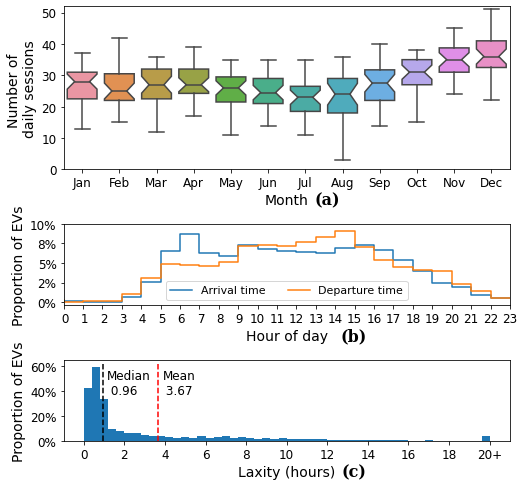

In [118]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (8, 8), height_ratios=[2,1,1], gridspec_kw={"hspace": 0.5})
fontsize = 14

# Ax1 
sns.boxplot(x="month", y="count", data=count_eld, ax=ax1, notch = True, showfliers = False)
l_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
x_ticks = ax1.get_xticks()
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(l_month, fontsize = fontsize - 2)
ax1.set_xlabel("Month", fontsize = fontsize)

ax1.set_ylim([0, 52])
y_ticks = ax1.get_yticks()[:-1]
ax1.set_yticks(y_ticks)
ax1.set_yticklabels([f"{y:.0f}" for y in y_ticks], fontsize = fontsize - 2)

ax1.set_ylabel("Number of \ndaily sessions", fontsize = fontsize)

# Ax2 
df_harr = df_eld.groupby("hour_arr").agg(count = ("hour_arr", "count")).reset_index()
df_hdep = df_eld.groupby("hour_dep").agg(count = ("hour_dep", "count")).reset_index()
ax2.plot(df_harr["hour_arr"], df_harr["count"]/10_000, drawstyle = 'steps', label = "Arrival time")
ax2.plot(df_hdep["hour_dep"], df_hdep["count"]/10_000, drawstyle = 'steps', label = "Departure time")

ax2.set_xlim([0, 23])
ax2.set_xticks(list(range(24)))
ax2.set_xticklabels([f"{x:2d}" for x in range(24)], fontsize = fontsize - 2)

y_ticks = ax2.get_yticks()[1:]
ax2.set_yticks(y_ticks)
ax2.set_yticklabels([f"{y*100:,.0f}%" for y in y_ticks], fontsize = fontsize - 2)

ax2.set_ylabel("Proportion of EVs", fontsize = fontsize)
ax2.set_xlabel("Hour of day", fontsize = fontsize)


# Ax3
df_eld["laxity_proc"] = df_eld["laxity"].apply(lambda x: min(x, 20))
ax3.hist(df_eld["laxity_proc"], bins = 50, density = True)
lax_mean = df_eld["laxity"].mean()
lax_p25, lax_p50, lax_p75 = np.percentile(df_eld["laxity"], (25, 50, 75))

y_lims =  ax3.get_ylim()
y_ticks = ax3.get_yticks()
ax3.set_yticks(y_ticks)
ax3.set_yticklabels([f"{100*y:,.0f}%" for y in y_ticks], fontsize = fontsize - 2)

ax3.vlines(lax_mean, y_lims[0], y_lims[1], color = "red", linestyle = "--")#, label = "Mean")
ax3.text(lax_mean + 0.2, y_lims[1] * 0.6, f"Mean\n {lax_mean:.2f}", fontsize = fontsize - 2) 

ax3.vlines(lax_p50, y_lims[0], y_lims[1], color = "k", linestyle = "--")#, label = "Median")
ax3.text(lax_p50 + 0.2, y_lims[1] * 0.6, f"Median\n {lax_p50:.2f}", fontsize = fontsize - 2) 

#ax2.vlines(lax_p25, y_lims[0], y_lims[1], color = "black", linestyle = "--")#, label = "Median")
#ax2.text(lax_p25 + 0.2, y_lims[1] * 0.7, f"p25: {lax_p25:.2f}", fontsize = fontsize - 2) 
#
#ax2.vlines(lax_p75, y_lims[0], y_lims[1], color = "black", linestyle = "--")#, label = "Median")
#ax2.text(lax_p75 + 0.2, y_lims[1] * 0.8, f"p25: {lax_p75:.2f}", fontsize = fontsize - 2) 

x_ticks = np.arange(0, 21, 2)
x_ticklabels = [f"{x:.0f}" for x in x_ticks]
x_ticklabels[-1] = f"{np.max(x_ticks)}+"
ax3.set_xticks(x_ticks)
ax3.set_xticklabels(x_ticklabels, fontsize = fontsize - 2)

ax3.set_xlabel("Laxity (hours)", fontsize = fontsize)
ax3.set_ylabel("Proportion of EVs", fontsize = fontsize)

ax1.set_title(f"(a)", family = "serif", fontweight = "bold", fontsize = fontsize + 2, x = 0.59, y = -0.25)
ax2.set_title(f"(b)", family = "serif", fontweight = "bold", fontsize = fontsize + 2, x = 0.65, y = -0.51)
ax3.set_title(f"(c)", family = "serif", fontweight = "bold", fontsize = fontsize + 2, x = 0.65, y = -0.51)

ax2.legend(ncol = 2, loc = "lower center", fontsize = fontsize-3, frameon = True)

fig1.tight_layout()
#fig1.savefig("/home/javier/Documents/Escuela/SCRG/Refs/Contracts/Figs/fig_revVPP.pdf", dpi = 1200, bbox_inches='tight')
fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/eld_eda.pdf", dpi = 1200, bbox_inches='tight')
# whis = 1.5*IQR


In [ ]:

y_ticks = ax2.get_yticks()[1:]
ax2.set_yticks(y_ticks)
ax2.set_yticklabels([f"{y*100:,.0f}%" for y in y_ticks], fontsize = fontsize - 2)

ax2.set_ylabel("Proportion of EVs", fontsize = fontsize)
ax2.set_xlabel("Hour of day", fontsize = fontsize)


# Ax3
df_eld["laxity_proc"] = df_eld["laxity"].apply(lambda x: min(x, 20))
ax3.hist(df_eld["laxity_proc"], bins = 50, density = True)
lax_mean = df_eld["laxity"].mean()
lax_p25, lax_p50, lax_p75 = np.percentile(df_eld["laxity"], (25, 50, 75))

y_lims =  ax3.get_ylim()
y_ticks = ax3.get_yticks()
ax3.set_yticks(y_ticks)
ax3.set_yticklabels([f"{100*y:,.0f}%" for y in y_ticks], fontsize = fontsize - 2)

ax3.vlines(lax_mean, y_lims[0], y_lims[1], color = "red", linestyle = "--")#, label = "Mean")
ax3.text(lax_mean + 0.2, y_lims[1] * 0.6, f"Mean\n {lax_mean:.2f}", fontsize = fontsize - 2) 

ax3.vlines(lax_p50, y_lims[0], y_lims[1], color = "k", linestyle = "--")#, label = "Median")
ax3.text(lax_p50 + 0.2, y_lims[1] * 0.6, f"Median\n {lax_p50:.2f}", fontsize = fontsize - 2) 

#ax2.vlines(lax_p25, y_lims[0], y_lims[1], color = "black", linestyle = "--")#, label = "Median")
#ax2.text(lax_p25 + 0.2, y_lims[1] * 0.7, f"p25: {lax_p25:.2f}", fontsize = fontsize - 2) 
#
#ax2.vlines(lax_p75, y_lims[0], y_lims[1], color = "black", linestyle = "--")#, label = "Median")
#ax2.text(lax_p75 + 0.2, y_lims[1] * 0.8, f"p25: {lax_p75:.2f}", fontsize = fontsize - 2) 

x_ticks = np.arange(0, 21, 2)
x_ticklabels = [f"{x:.0f}" for x in x_ticks]
x_ticklabels[-1] = f"{np.max(x_ticks)}+"
ax3.set_xticks(x_ticks)
ax3.set_xticklabels(x_ticklabels, fontsize = fontsize - 2)

ax3.set_xlabel("Laxity (hours)", fontsize = fontsize)
ax3.set_ylabel("Proportion of EVs", fontsize = fontsize)

ax1.set_title(f"(a)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.4)
ax2.set_title(f"(b)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.8)
ax3.set_title(f"(c)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.8)

ax2.legend(ncol = 2, loc = "lower center", fontsize = fontsize-2)

fig1.tight_layout()
#fig1.savefig("/home/javier/Documents/Escuela/SCRG/Refs/Contracts/Figs/fig_revVPP.pdf", dpi = 1200, bbox_inches='tight')
fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/eld_eda.pdf", dpi = 1200, bbox_inches='tight')
# whis = 1.5*IQR


In [120]:
ts_f = df_sessions_f6moth["ts_dep"].max() - df_sessions_f6moth["ts_arr"].min()
ts_l = df_sessions_l6moth["ts_dep"].max() - df_sessions_l6moth["ts_arr"].min()

print(ts_f, ts_l, ts_f + ts_l)

4354.0 4408.0 8762.0


In [41]:
df_sessions_f6moth = pd.read_csv("../data/df_elaad_preproc_f6months.csv", parse_dates = ["starttime_parking", "endtime_parking"])
df_sessions_l6moth = pd.read_csv("../data/df_elaad_preproc_l6months.csv", parse_dates = ["starttime_parking", "endtime_parking"])

display(df_sessions_f6moth.describe())
display(df_sessions_l6moth.describe())
print(4764+ 5233)
#args.file_sessions = "df_elaad_preproc_f6months.csv"


,session,Connector,starttime_parking,endtime_parking,connected_time_float,charged_time_float,total_energy,max_power,start_hour,day_no,...,soc_arr,charged_time,connected_time,ts_arr,ts_dep,ts_soj,laxity,depart_hour,xi,laxity_float
count,4.764000e+03,4764.000000,4764,4764,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,...,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4.764000e+03,4764.000000,4.764000e+03,4.764000e+03
mean,3.354769e+06,1.352855,2019-03-31 07:08:41.599496192,2019-03-31 12:39:51.322417920,5.519181,2.718136,12.040729,5.108307,12.339421,88.762594,...,0.626774,3.193535,6.026029,168702.641688,168708.667716,6.026029,3.478899e+00,18.365449,1.874744e+01,2.972052e+00
min,3.261657e+06,1.000000,2019-01-01 00:30:00,2019-01-01 08:24:00,0.020000,0.020000,0.100000,0.167000,0.000000,0.000000,...,0.000000,1.000000,1.000000,166560.000000,166568.000000,1.000000,-4.440892e-16,2.000000,-2.393152e-15,-8.881784e-16
25%,3.310866e+06,1.000000,2019-02-14 08:37:45,2019-02-14 12:18:45,1.490000,1.250000,4.287500,3.360000,8.000000,44.000000,...,0.530378,2.000000,2.000000,167624.000000,167628.000000,2.000000,5.300000e-01,13.000000,2.856117e+00,0.000000e+00
50%,3.356912e+06,1.000000,2019-03-31 11:48:30,2019-03-31 14:30:30,3.260000,2.090000,7.160000,3.592000,12.000000,89.000000,...,0.688373,3.000000,4.000000,168707.000000,168711.000000,4.000000,9.600000e-01,16.000000,5.173344e+00,3.200000e-01
75%,3.399230e+06,2.000000,2019-05-15 06:08:45,2019-05-15 10:12:00,8.060000,3.262500,14.635000,6.870750,16.000000,134.000000,...,0.801562,4.000000,9.000000,169782.000000,169786.000000,9.000000,4.715000e+00,21.000000,2.540866e+01,4.150000e+00
max,3.443206e+06,2.000000,2019-06-30 19:21:00,2019-07-01 10:04:00,47.900000,21.720000,93.929000,18.000000,23.000000,180.000000,...,0.967305,22.000000,48.000000,170899.000000,170914.000000,48.000000,4.725000e+01,64.000000,2.546255e+02,4.715000e+01
std,5.173014e+04,0.477908,NaN,NaN,6.039166,2.419631,13.219925,3.030419,4.507305,51.765006,...,0.248203,2.424227,6.038591,1241.955524,1241.937716,6.038591,5.273831e+00,8.320864,2.842015e+01,5.270278e+00


,session,Connector,starttime_parking,endtime_parking,connected_time_float,charged_time_float,total_energy,max_power,start_hour,day_no,...,soc_arr,charged_time,connected_time,ts_arr,ts_dep,ts_soj,laxity,depart_hour,xi,laxity_float
count,5.233000e+03,5233.000000,5233,5233,5233.000000,5233.000000,5233.000000,5233.000000,5233.000000,5233.000000,...,5233.000000,5233.000000,5233.000000,5233.000000,5233.000000,5233.000000,5.233000e+03,5233.000000,5.233000e+03,5.233000e+03
mean,3.541974e+06,1.367093,2019-10-12 11:26:36.781960704,2019-10-12 17:32:15.352570368,6.094019,3.022822,15.085315,6.027004,12.476782,283.936365,...,0.599403,3.501815,6.598318,173386.949551,173393.547869,6.598318,3.848063e+00,19.075100,2.073683e+01,3.343764e+00
min,3.443292e+06,1.000000,2019-07-01 05:22:00,2019-07-01 08:50:00,0.030000,0.030000,0.200000,0.336000,0.000000,181.000000,...,0.000000,1.000000,1.000000,170909.000000,170913.000000,1.000000,-4.440892e-16,2.000000,-2.393152e-15,-8.881784e-16
25%,3.496500e+06,1.000000,2019-09-01 17:32:00,2019-09-02 05:51:00,1.540000,1.250000,4.850000,3.440000,9.000000,243.000000,...,0.474120,2.000000,2.000000,172409.000000,172421.000000,2.000000,5.300000e-01,13.000000,2.856117e+00,0.000000e+00
50%,3.543693e+06,1.000000,2019-10-18 09:52:00,2019-10-18 15:37:00,3.540000,2.270000,8.720000,3.724000,12.000000,290.000000,...,0.664118,3.000000,4.000000,173529.000000,173536.000000,4.000000,9.600000e-01,16.000000,5.173344e+00,3.100000e-01
75%,3.588909e+06,2.000000,2019-11-26 12:32:00,2019-11-26 16:23:00,8.650000,3.680000,21.730000,9.360000,16.000000,329.000000,...,0.801562,4.000000,9.000000,174468.000000,174472.000000,9.000000,5.140000e+00,22.000000,2.769895e+01,4.700000e+00
max,3.634022e+06,2.000000,2019-12-31 17:46:00,2019-12-31 21:04:00,161.170000,25.670000,91.060000,22.500000,23.000000,364.000000,...,0.965958,26.000000,162.000000,175313.000000,175317.000000,162.000000,1.548015e+02,175.000000,8.342098e+02,1.539715e+02
std,5.452762e+04,0.482058,NaN,NaN,7.924487,2.825443,15.042249,3.531168,4.553358,52.303275,...,0.264658,2.832014,7.920231,1255.758725,1255.908562,7.920231,7.158568e+00,9.857582,3.857681e+01,7.161874e+00


9997


## IMB prices
* Load dataset
* Histogram of prices
    * Vlines for avg, std, etc
* Boxplot of various times

In [31]:
df_price_all = pd.read_csv("../data/df_prices_c.csv", parse_dates = ["date"])
df_price_all["hour"] = df_price_all["date"].dt.hour
df_price_all["month"] = df_price_all["date"].dt.month
df_price_all["year"] = df_price_all["date"].dt.year
df_price = df_price_all[df_price_all["year"] == 2019]

df_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 43824 to 52583
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      8760 non-null   datetime64[ns]
 1   price_da  8760 non-null   int64         
 2   price_im  8760 non-null   float64       
 3   ts        8760 non-null   float64       
 4   hour      8760 non-null   int32         
 5   month     8760 non-null   int32         
 6   year      8760 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1)
memory usage: 444.8 KB


In [34]:
df_price.describe()

,date,price_da,price_im,ts,hour,month,year
count,8760,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.0
mean,2019-07-02 12:04:31.232876800,0.0,0.047665,170939.500000,11.500000,6.526826,2019.0
min,2019-01-01 00:00:00,0.0,-0.487650,166560.000000,0.000000,1.000000,2019.0
25%,2019-04-02 06:45:00,0.0,0.025898,168749.750000,5.750000,4.000000,2019.0
50%,2019-07-02 12:30:00,0.0,0.033470,170939.500000,11.500000,7.000000,2019.0
75%,2019-10-01 18:15:00,0.0,0.046992,173129.250000,17.250000,10.000000,2019.0
max,2019-12-31 23:00:00,0.0,0.764920,175319.000000,23.000000,12.000000,2019.0
std,NaN,0.0,0.062293,2528.938512,6.922582,3.448042,0.0


In [36]:
np.percentile(df_price["price_im"], (85))

0.06569649999999996

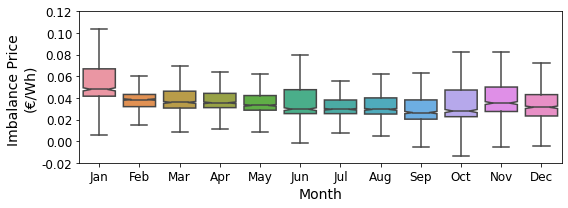

In [42]:
fig1, ax1 = plt.subplots(1, 1, figsize = (8, 3))
fontsize = 14

# Ax1
sns.boxplot(x="month", y="price_im", data=df_price, ax=ax1, showfliers=False, notch = True)
ax1.set_xlabel("Month", fontsize = fontsize)
ax1.set_ylabel("Imbalance Price \n(€/Wh)", fontsize = fontsize)
l_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
x_ticks = ax1.get_xticks()
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(l_month, fontsize = fontsize - 2)
y_ticks = ax1.get_yticks()
ax1.set_yticks(y_ticks)
ax1.set_yticklabels([f"{y:.2f}" for y in y_ticks], fontsize = fontsize - 2)

# Ax2
#ax2.hist(df_price["price_im"], bins = 50)
#y_lims =  ax2.get_ylim()
#y_ticks = ax2.get_yticks()
#ax2.set_yticks(y_ticks)
#ax2.set_yticklabels([f"{y:,.0f}" for y in y_ticks], fontsize = fontsize - 2)
#x_ticks = ax2.get_xticks()[1:-1]
#ax2.set_xticks(x_ticks)
#ax2.set_xticklabels([f"{x:.2f}" for x in x_ticks], fontsize = fontsize - 2)
#ax2.set_ylabel("Frequency", fontsize = fontsize)
#ax2.set_xlabel("Imbalance Price (€/Wh)", fontsize = fontsize)
#im_mean = df_price["price_im"].mean()
#im_p25, im_p50, im_p75 = np.percentile(df_price["price_im"], (25, 50, 75))
#ax2.vlines(im_mean, y_lims[0], y_lims[1], color = "red", linestyle = "--")#, label = "Mean")
#ax2.text(im_mean + 0.02, y_lims[1] * 0.75, f"Mean\n {im_mean:.2f}", fontsize = fontsize - 2)
#ax2.vlines(im_p50, y_lims[0], y_lims[1], color = "k", linestyle = "--")#, label = "Median")
#ax2.text(im_p50 - 0.02, y_lims[1] * 0.75, f"Median\n {im_p50:.2f}  ", ha = 'right', fontsize = fontsize - 2)

#ax2.vlines(im_p25, y_lims[0], y_lims[1], color = "black", linestyle = "--")#, label = "Median")
#ax2.text(im_p25 + 0.02, y_lims[1] * 0.7, f"p25:\n {im_p25:.2f}", fontsize = fontsize - 2)
#ax2.vlines(im_p75, y_lims[0], y_lims[1], color = "black", linestyle = "--")#, label = "Median")
#ax2.text(im_p75 + 0.02, y_lims[1] * 0.8, f"p75:\n {im_p75:.2f}", fontsize = fontsize - 2)

#ax1.set_title(f"(a)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.5)
#ax2.set_title(f"(b)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.5)
fig1.tight_layout()

fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/price_eda.pdf", dpi = 1200, bbox_inches='tight')

In [145]:

df_imb_pre = pd.read_csv('../ElectricityMarkets/data/tennet/settlementprices_history.csv', parse_dates=["Date"])
df_imb_pre["datetime"] = df_imb_pre["Date"] + pd.to_timedelta(df_imb_pre["period_from"]+':00')
df_imb_pre["hour"] = df_imb_pre["datetime"].dt.hour
df_imb_pre = df_imb_pre[df_imb_pre["datetime"].dt.year == 2019]
df_imb_pre = df_imb_pre[df_imb_pre["period_from"].apply(lambda x: x.split(':')[-1]) == '45']
df_imb_pre.head()

/tmp/ipykernel_195015/2183705302.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_imb_pre = pd.read_csv('../ElectricityMarkets/data/tennet/settlementprices_history.csv', parse_dates=["Date"])


,Date,PTE,period_from,period_until,upward_incident_reserve,downward_incident_reserve,To regulate up,To regulate down,Incentive component,Consume,Feed,Regulation state,datetime,hour
175296,2019-01-01,1,00:00,00:15,NaN,NaN,58.01,34.85,0,58.01,34.85,2,2019-01-01 00:00:00,0
175297,2019-01-01,2,00:15,00:30,NaN,NaN,NaN,38.85,0,38.85,38.85,-1,2019-01-01 00:15:00,0
175298,2019-01-01,3,00:30,00:45,NaN,NaN,NaN,42.85,0,42.85,42.85,-1,2019-01-01 00:30:00,0
175299,2019-01-01,4,00:45,01:00,NaN,NaN,NaN,39.03,0,39.03,39.03,-1,2019-01-01 00:45:00,0
175300,2019-01-01,5,01:00,01:15,NaN,NaN,NaN,42.85,0,42.85,42.85,-1,2019-01-01 01:00:00,1


In [148]:
df_imb_1 = df_imb_pre[df_imb_pre["period_from"].apply(lambda x: x.split(':')[-1]) == '00']
df_imb_2 = df_imb_pre[df_imb_pre["period_from"].apply(lambda x: x.split(':')[-1]) == '15']
df_imb_3 = df_imb_pre[df_imb_pre["period_from"].apply(lambda x: x.split(':')[-1]) == '30']
df_imb_4 = df_imb_pre[df_imb_pre["period_from"].apply(lambda x: x.split(':')[-1]) == '45']

display(df_imb_1["Consume"].describe())
display(df_imb_2["Consume"].describe())
display(df_imb_3["Consume"].describe())
display(df_imb_4["Consume"].describe())
print(df_imb_1["Consume"].describe().to_csv())

count    8760.000000
mean       47.664702
std        62.293121
min      -487.650000
25%        25.897500
50%        33.470000
75%        46.992500
max       764.920000
Name: Consume, dtype: float64

count    8760.000000
mean       42.018881
std        48.561520
min      -429.950000
25%        25.990000
50%        32.165000
75%        41.290000
max       537.260000
Name: Consume, dtype: float64

count    8760.000000
mean       38.980237
std        42.361759
min      -239.900000
25%        25.450000
50%        31.655000
75%        40.462500
max       594.920000
Name: Consume, dtype: float64

count    8760.000000
mean       41.552508
std        52.394749
min      -239.900000
25%        24.657500
50%        31.300000
75%        41.822500
max       936.120000
Name: Consume, dtype: float64

,Consume
count,8760.0
mean,47.66470205479452
std,62.2931208253394
min,-487.65
25%,25.8975
50%,33.47
75%,46.9925
max,764.92



<Axes: xlabel='hour', ylabel='Feed'>

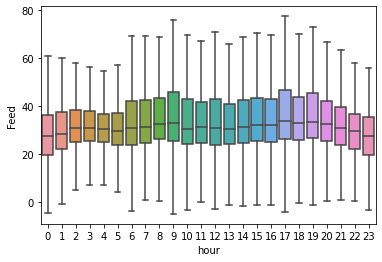

In [232]:

sns.boxplot(x="hour", y="Feed", data=df_imb_pre, showfliers=False)